In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import shap

In [32]:
data = pd.read_csv("2525_trainingdata.csv")
data.head()
# print(data.index)

,SBP,DBP,bedTime_24,upTime_24,minutesAsleep_24,deep_24,light_24,rem_24,wake_24,sleepHR_24,...,fatburn_minutes_ewma,cardio_minutes_ewma,peak_minutes_ewma,stress_ewma,mood_ewma,alcohol_ewma,red_meat_ewma,fruit_ewma,vegetable_ewma,salt_ewma
0,136.00,94.33,-42.6,399.8,370.2,57.8,219.4,93.0,71.3,60.7,...,24.1,2.4,0.4,1.6,4.0,0.0,2.0,0.0,0.0,1.6
1,154.33,103.33,-42.6,399.8,370.2,57.8,219.4,93.0,71.3,60.7,...,24.1,2.4,0.4,1.6,4.0,0.0,2.0,0.0,0.0,1.6
2,143.75,100.00,-45.0,397.1,369.4,57.0,219.4,93.0,74.3,59.0,...,0.0,0.0,0.0,1.0,4.0,0.0,2.0,0.0,0.0,1.0
3,125.67,93.67,-45.0,397.1,369.4,57.0,219.4,93.0,74.3,59.0,...,0.0,0.0,0.0,1.0,4.0,0.0,2.0,0.0,0.0,1.0
4,142.67,97.00,-42.6,399.8,370.2,57.8,219.4,93.0,71.3,60.7,...,24.1,2.4,0.4,1.6,4.0,0.0,2.0,0.0,0.0,1.6


In [33]:
# label is SBP
y = data.SBP

# drop SBP/DBP - not features
X = data.drop(columns=["DBP", "SBP"])
X_features = list(X.columns)
print("# features:", len(X_features))

print(X_features)
print(y)


# features: 58
['bedTime_24', 'upTime_24', 'minutesAsleep_24', 'deep_24', 'light_24', 'rem_24', 'wake_24', 'sleepHR_24', 'sleepHRstd_24', 'steps_24', 'speed_24', 'sedentary_24', 'lightly_active_24', 'fairly_active_24', 'very_active_24', 'maxActiveHR_24', 'meanActiveHR_24', 'sed_minutes_24', 'fatburn_minutes_24', 'cardio_minutes_24', 'peak_minutes_24', 'rhr_24', 'stress_24', 'mood_24', 'alcohol_24', 'red_meat_24', 'fruit_24', 'vegetable_24', 'salt_24', 'bedTime_ewma', 'upTime_ewma', 'minutesAsleep_ewma', 'deep_ewma', 'light_ewma', 'rem_ewma', 'wake_ewma', 'sleepHR_ewma', 'sleepHRstd_ewma', 'steps_ewma', 'sedentary_ewma', 'lightly_active_ewma', 'fairly_active_ewma', 'very_active_ewma', 'speed_ewma', 'maxActiveHR_ewma', 'meanActiveHR_ewma', 'rhr_ewma', 'sed_minutes_ewma', 'fatburn_minutes_ewma', 'cardio_minutes_ewma', 'peak_minutes_ewma', 'stress_ewma', 'mood_ewma', 'alcohol_ewma', 'red_meat_ewma', 'fruit_ewma', 'vegetable_ewma', 'salt_ewma']
0      136.00
1      154.33
2      143.75
3   

In [34]:
X

,bedTime_24,upTime_24,minutesAsleep_24,deep_24,light_24,rem_24,wake_24,sleepHR_24,sleepHRstd_24,steps_24,...,fatburn_minutes_ewma,cardio_minutes_ewma,peak_minutes_ewma,stress_ewma,mood_ewma,alcohol_ewma,red_meat_ewma,fruit_ewma,vegetable_ewma,salt_ewma
0,-42.6,399.8,370.2,57.8,219.4,93.0,71.3,60.7,4.5,5921.5,...,24.1,2.4,0.4,1.6,4.0,0.0,2.0,0.0,0.0,1.6
1,-42.6,399.8,370.2,57.8,219.4,93.0,71.3,60.7,4.5,5921.5,...,24.1,2.4,0.4,1.6,4.0,0.0,2.0,0.0,0.0,1.6
2,-45.0,397.1,369.4,57.0,219.4,93.0,74.3,59.0,6.1,5856.7,...,0.0,0.0,0.0,1.0,4.0,0.0,2.0,0.0,0.0,1.0
3,-45.0,397.1,369.4,57.0,219.4,93.0,74.3,59.0,6.1,5856.7,...,0.0,0.0,0.0,1.0,4.0,0.0,2.0,0.0,0.0,1.0
4,-42.6,399.8,370.2,57.8,219.4,93.0,71.3,60.7,4.5,5921.5,...,24.1,2.4,0.4,1.6,4.0,0.0,2.0,0.0,0.0,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,-15.0,455.0,420.0,70.0,228.0,122.0,50.0,56.0,2.8,6159.0,...,48.7,7.8,0.1,1.8,4.0,0.0,1.3,1.6,3.0,0.8
224,-15.0,455.0,420.0,70.0,228.0,122.0,50.0,56.0,2.8,8433.0,...,48.7,7.8,0.1,1.8,4.0,0.0,1.3,1.6,3.0,0.8
225,154.0,600.0,381.0,47.0,254.0,80.0,65.0,59.0,5.7,2584.0,...,47.4,6.3,0.1,1.6,4.0,0.0,1.8,0.9,1.6,1.6
226,154.0,600.0,381.0,47.0,254.0,80.0,65.0,59.0,5.7,3230.0,...,47.4,6.3,0.1,1.7,4.0,0.0,1.4,1.7,3.4,1.3


In [35]:
# define model parameters 
max_depth = [int(x) for x in np.linspace(2, 30, 15)]
max_depth.append(None)
param = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
            'max_features': [0.33, 'sqrt', 0.5],
            'max_depth': max_depth,
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'bootstrap': [True, False]}

model = RandomForestRegressor(n_estimators = 500,  n_jobs = -1)

In [36]:
# hyperparameter tuning
rf_randomCV = RandomizedSearchCV(estimator=model, param_distributions=param, cv=5, verbose=2,
                                   random_state=41, n_jobs=-1, n_iter=50)
rf_randomCV.fit(X, y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_estimators=500, n_jobs=-1),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4, 6, 8, 10, 12, 14,
                                                      16, 18, 20, 22, 24, 26,
                                                      28, 30, None],
                                        'max_features': [0.33, 'sqrt', 0.5],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=41, verbose=2)

In [37]:
# fit best model
model = rf_randomCV.best_estimator_
model = model.fit(X, y)

y_pred = model.predict(X)
print(model)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=2000, n_jobs=-1)


### Shapley Value Analysis

In [38]:
explainer_2 = shap.Explainer(model, X)
shap_values_2 = explainer_2.shap_values(X)

 99%|===================| 226/228 [00:32<00:00]        

In [39]:
shap_df = pd.DataFrame(np.abs(shap_values_2), index=X.index,columns=X.columns)
shap_df

,bedTime_24,upTime_24,minutesAsleep_24,deep_24,light_24,rem_24,wake_24,sleepHR_24,sleepHRstd_24,steps_24,...,fatburn_minutes_ewma,cardio_minutes_ewma,peak_minutes_ewma,stress_ewma,mood_ewma,alcohol_ewma,red_meat_ewma,fruit_ewma,vegetable_ewma,salt_ewma
0,0.069250,0.188422,0.170136,0.097982,0.030992,0.050919,0.108473,0.154739,0.131984,0.029182,...,0.092958,0.188462,0.049841,0.007757,0.054628,0.0,0.011696,0.168524,0.237158,0.034107
1,0.069250,0.188422,0.170136,0.097982,0.030992,0.050919,0.108473,0.154739,0.131984,0.029182,...,0.092958,0.188462,0.049841,0.007757,0.054628,0.0,0.011696,0.168524,0.237158,0.034107
2,0.035826,0.236008,0.224618,0.165872,0.135127,0.088404,0.190984,0.277311,0.341100,0.153184,...,0.192032,0.340925,0.055872,1.241702,0.056828,0.0,0.046968,0.207732,0.320387,0.473600
3,0.035826,0.236008,0.224618,0.165872,0.135127,0.088404,0.190984,0.277311,0.341100,0.153184,...,0.192032,0.340925,0.055872,1.241702,0.056828,0.0,0.046968,0.207732,0.320387,0.473600
4,0.065167,0.189934,0.179065,0.100089,0.036993,0.052924,0.105538,0.156477,0.124001,0.014532,...,0.093230,0.187668,0.050251,0.008271,0.054822,0.0,0.012339,0.174644,0.243037,0.033846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,0.117274,0.064548,0.426225,0.014296,0.033138,0.040560,0.060748,0.672335,0.398422,0.159808,...,0.318864,0.484434,0.011411,0.096959,0.065459,0.0,0.153480,0.101052,0.257181,0.177516
224,0.122562,0.042407,0.476086,0.018056,0.001789,0.029114,0.058842,0.718194,0.361400,0.082570,...,0.298097,0.550184,0.015648,0.080301,0.062843,0.0,0.201581,0.071575,0.230439,0.229630
225,0.055225,0.054117,0.309597,0.214547,0.586958,0.066242,0.217020,0.208996,0.455149,0.218640,...,0.151461,0.552539,0.003293,0.040966,0.059457,0.0,0.039792,0.102680,0.180244,0.063896
226,0.039903,0.027621,0.348258,0.248141,0.687636,0.091982,0.243923,0.285802,0.367700,0.172009,...,0.089524,0.575426,0.021961,0.113920,0.053255,0.0,0.474794,0.167760,0.026052,0.576194


In [40]:
shap_df1 = shap_df.mean().to_frame().T
# print(type(shap_new_df))


In [41]:
shap_df1

,bedTime_24,upTime_24,minutesAsleep_24,deep_24,light_24,rem_24,wake_24,sleepHR_24,sleepHRstd_24,steps_24,...,fatburn_minutes_ewma,cardio_minutes_ewma,peak_minutes_ewma,stress_ewma,mood_ewma,alcohol_ewma,red_meat_ewma,fruit_ewma,vegetable_ewma,salt_ewma
0,0.10274,0.270924,0.374225,0.161668,0.382573,0.059032,0.196886,0.473357,0.429183,0.132292,...,0.184073,0.366672,0.07556,0.204072,0.086164,0.0,0.098111,0.142605,0.213544,0.177452


In [42]:
shap_df2 = shap_df1.T
# print(type(shap_new_df_r))


shap_df2.head(10)

,0
bedTime_24,0.102740
upTime_24,0.270924
minutesAsleep_24,0.374225
deep_24,0.161668
light_24,0.382573
rem_24,0.059032
wake_24,0.196886
sleepHR_24,0.473357
sleepHRstd_24,0.429183
steps_24,0.132292


In [47]:
shap_df2.rename( columns={0:'SHAP Mean'}, inplace=True )
shap_df2["Rank"] = shap_df2["SHAP Mean"].rank(ascending=False)
shap_df2 = shap_df2.sort_values("Rank")
shap_df2.head(10)



,SHAP Mean,Rank
stress_24,0.487495,1.0
sleepHR_24,0.473357,2.0
sleepHRstd_24,0.429183,3.0
light_24,0.382573,4.0
minutesAsleep_24,0.374225,5.0
cardio_minutes_ewma,0.366672,6.0
rhr_ewma,0.358623,7.0
rem_ewma,0.345357,8.0
lightly_active_24,0.310370,9.0
upTime_24,0.270924,10.0


In [80]:
explainer_1 = shap.Explainer(model, X)
shap_values_1 = explainer_1(X)

 96%|=================== | 219/228 [00:24<00:00]       

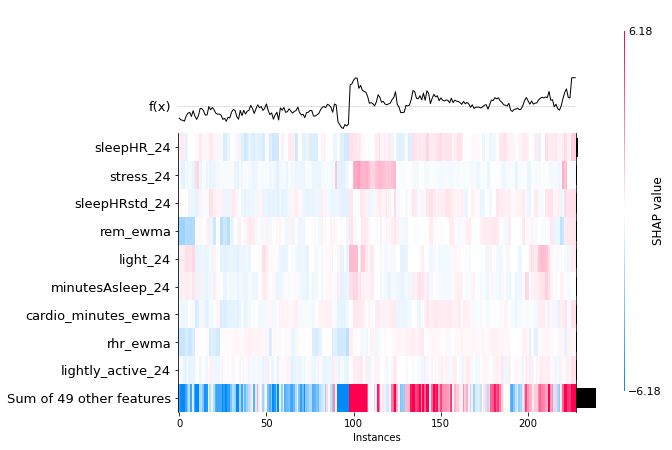

In [81]:
shap.plots.heatmap(shap_values_1)

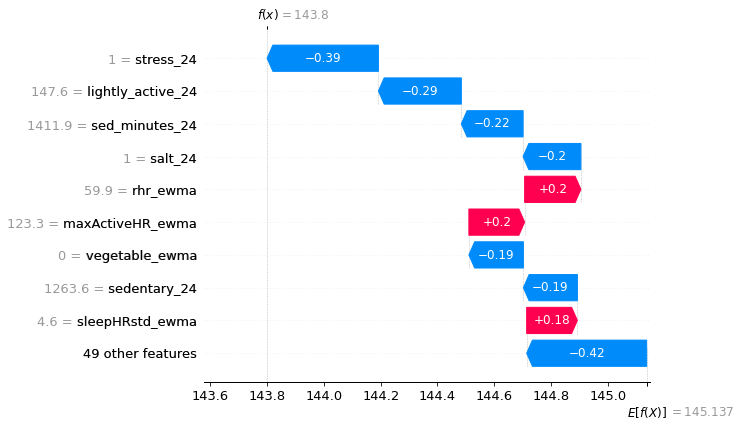

In [82]:
# Individual Data Sample Analysis
n = 0 # data sample number
shap.plots.waterfall(shap_values_1[n])

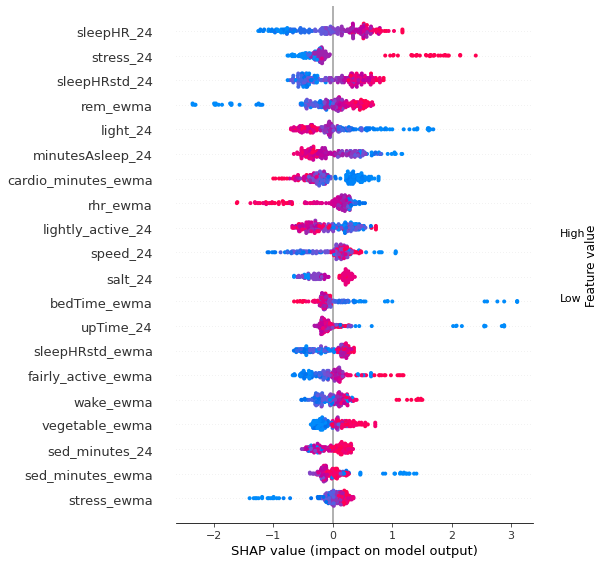

In [83]:
shap.summary_plot(shap_values_1)

### Shapley Interactions

In [48]:
explainer = shap.TreeExplainer(model)
shap_interaction = explainer.shap_interaction_values(X)
print(np.shape(shap_interaction))

(228, 58, 58)


In [49]:

df_si = pd.DataFrame(np.abs(shap_interaction[0]),index=X.columns,columns=X.columns)
df_si

,bedTime_24,upTime_24,minutesAsleep_24,deep_24,light_24,rem_24,wake_24,sleepHR_24,sleepHRstd_24,steps_24,...,fatburn_minutes_ewma,cardio_minutes_ewma,peak_minutes_ewma,stress_ewma,mood_ewma,alcohol_ewma,red_meat_ewma,fruit_ewma,vegetable_ewma,salt_ewma
bedTime_24,0.059885,0.000544,0.002246,0.000344,0.001859,0.000122,0.003842,0.002153,0.001339,0.000400,...,0.002212,0.006832,0.000490,0.002220,4.901409e-04,0.0,0.000492,0.002142,0.000755,0.000736
upTime_24,0.000544,0.277238,0.000416,0.001355,0.002854,0.001938,0.003404,0.001119,0.000915,0.001009,...,0.002151,0.003624,0.001932,0.001058,1.074510e-03,0.0,0.002345,0.001817,0.003280,0.000567
minutesAsleep_24,0.002246,0.000416,0.128876,0.001144,0.001131,0.002020,0.001142,0.001459,0.000564,0.001260,...,0.003711,0.005080,0.001060,0.000524,1.049452e-03,0.0,0.001533,0.005373,0.003577,0.001165
deep_24,0.000344,0.001355,0.001144,0.101610,0.001235,0.001247,0.000876,0.005224,0.000321,0.000329,...,0.001310,0.003063,0.001374,0.000313,3.395540e-04,0.0,0.000189,0.001107,0.005325,0.000602
light_24,0.001859,0.002854,0.001131,0.001235,0.053358,0.001189,0.002966,0.003292,0.002514,0.007278,...,0.000050,0.003928,0.003262,0.001909,9.302516e-05,0.0,0.002116,0.004259,0.004477,0.001770
rem_24,0.000122,0.001938,0.002020,0.001247,0.001189,0.042926,0.000473,0.003971,0.002387,0.000417,...,0.001248,0.000405,0.000312,0.000710,9.851928e-05,0.0,0.000897,0.002822,0.000081,0.001193
wake_24,0.003842,0.003404,0.001142,0.000876,0.002966,0.000473,0.154996,0.000526,0.007259,0.001931,...,0.000009,0.007307,0.005797,0.004964,3.965718e-04,0.0,0.000129,0.001364,0.000261,0.001145
sleepHR_24,0.002153,0.001119,0.001459,0.005224,0.003292,0.003971,0.000526,0.160135,0.004961,0.001015,...,0.000594,0.004461,0.000804,0.002741,1.526825e-03,0.0,0.000581,0.007006,0.004602,0.001439
sleepHRstd_24,0.001339,0.000915,0.000564,0.000321,0.002514,0.002387,0.007259,0.004961,0.095380,0.004345,...,0.005758,0.001192,0.003029,0.003277,6.776070e-04,0.0,0.002456,0.005351,0.005900,0.004213
steps_24,0.000400,0.001009,0.001260,0.000329,0.007278,0.000417,0.001931,0.001015,0.004345,0.078420,...,0.004704,0.008099,0.000648,0.002780,3.551181e-04,0.0,0.001269,0.004277,0.002562,0.000467


In [50]:
df_si = pd.DataFrame(np.abs(shap_interaction[4]),index=X.columns,columns=X.columns)
df_si

,bedTime_24,upTime_24,minutesAsleep_24,deep_24,light_24,rem_24,wake_24,sleepHR_24,sleepHRstd_24,steps_24,...,fatburn_minutes_ewma,cardio_minutes_ewma,peak_minutes_ewma,stress_ewma,mood_ewma,alcohol_ewma,red_meat_ewma,fruit_ewma,vegetable_ewma,salt_ewma
bedTime_24,0.060735,0.000726,0.002274,0.000356,0.001855,0.000183,4.031552e-03,0.002279,0.001200,0.000393,...,0.002122,0.006832,0.000500,0.002170,4.908278e-04,0.0,0.000495,0.002155,0.000532,0.000936
upTime_24,0.000726,0.275952,0.000293,0.001311,0.002402,0.001782,3.381758e-03,0.001106,0.000953,0.000959,...,0.002164,0.003628,0.002182,0.000950,1.036959e-03,0.0,0.002364,0.001581,0.003258,0.000609
minutesAsleep_24,0.002274,0.000293,0.127183,0.001075,0.000805,0.002106,1.064965e-03,0.001274,0.000832,0.000870,...,0.003781,0.004949,0.001025,0.000529,1.313777e-03,0.0,0.001530,0.005831,0.003654,0.001464
deep_24,0.000356,0.001311,0.001075,0.100994,0.001264,0.001057,8.593405e-04,0.005655,0.000115,0.000260,...,0.001297,0.003084,0.001312,0.000285,2.936120e-04,0.0,0.000174,0.001592,0.005394,0.000558
light_24,0.001855,0.002402,0.000805,0.001264,0.051297,0.001078,2.959410e-03,0.003082,0.002348,0.007031,...,0.000124,0.003589,0.003296,0.001860,9.686006e-05,0.0,0.002258,0.004213,0.004575,0.001881
rem_24,0.000183,0.001782,0.002106,0.001057,0.001078,0.042270,4.720309e-04,0.004209,0.002313,0.000391,...,0.001208,0.000432,0.000325,0.000756,9.561032e-05,0.0,0.000897,0.003090,0.000114,0.001193
wake_24,0.004032,0.003382,0.001065,0.000859,0.002959,0.000472,1.551509e-01,0.000698,0.007868,0.002396,...,0.000045,0.007311,0.005816,0.004981,4.043058e-04,0.0,0.000138,0.001164,0.000476,0.001280
sleepHR_24,0.002279,0.001106,0.001274,0.005655,0.003082,0.004209,6.983863e-04,0.163573,0.004810,0.000825,...,0.000881,0.004321,0.000785,0.002633,1.521606e-03,0.0,0.000565,0.007196,0.005011,0.001526
sleepHRstd_24,0.001200,0.000953,0.000832,0.000115,0.002348,0.002313,7.868212e-03,0.004810,0.097567,0.003990,...,0.005909,0.001188,0.004032,0.003257,7.272764e-04,0.0,0.002695,0.005353,0.006024,0.004382
steps_24,0.000393,0.000959,0.000870,0.000260,0.007031,0.000391,2.395971e-03,0.000825,0.003990,0.076906,...,0.004710,0.007916,0.000700,0.002767,3.551181e-04,0.0,0.001255,0.004239,0.002505,0.000467


In [51]:
print(np.diag(df_si))

[6.07348636e-02 2.75952371e-01 1.27182913e-01 1.00994414e-01
 5.12974254e-02 4.22697881e-02 1.55150876e-01 1.63572558e-01
 9.75674120e-02 7.69060700e-02 8.78922257e-02 2.89987612e-01
 2.81936611e-01 8.23518299e-02 5.35512669e-02 7.31256602e-02
 2.78100461e-02 1.85393664e-01 1.69153272e-02 1.46678733e-03
 2.49026695e-02 2.17325841e-02 2.44010945e-01 2.59637224e-04
 0.00000000e+00 1.54210451e-01 2.35395198e-02 1.03546229e-01
 3.07503173e-01 1.77903520e-01 2.66464393e-02 5.43420864e-04
 6.38217639e-02 3.22584064e-02 6.82121326e-02 4.92129200e-02
 1.84665335e-02 1.72911961e-01 5.66802106e-02 1.42303963e-01
 1.12732593e-03 6.47392115e-02 5.35803220e-02 2.14466401e-02
 1.48197676e-01 6.64945190e-02 2.25774326e-01 1.85915837e-01
 1.28471998e-01 2.35736265e-01 7.65032996e-02 3.85092234e-03
 6.52010126e-02 0.00000000e+00 5.32697849e-03 1.69242197e-01
 2.60369558e-01 2.58560334e-02]


In [52]:
my_list = []
i = 0
while i<228:
    df_si = pd.DataFrame(np.abs(shap_interaction[i]),index=X.columns,columns=X.columns)
    my_list.append(np.diag(df_si))
    i+=1
    


In [53]:
my_list

[array([5.98845732e-02, 2.77237818e-01, 1.28876092e-01, 1.01610122e-01,
        5.33576304e-02, 4.29256597e-02, 1.54996166e-01, 1.60135251e-01,
        9.53801151e-02, 7.84197299e-02, 8.58860772e-02, 2.89828038e-01,
        2.82898222e-01, 8.30574879e-02, 5.13484568e-02, 7.23288224e-02,
        2.60883687e-02, 1.87180049e-01, 1.76272334e-02, 1.34776171e-03,
        2.47272156e-02, 2.21646166e-02, 4.47499935e-01, 2.59637224e-04,
        0.00000000e+00, 1.55332254e-01, 2.38373039e-02, 1.04962506e-01,
        3.08405068e-01, 1.78993344e-01, 2.76176044e-02, 1.21026388e-03,
        6.29315074e-02, 3.48792395e-02, 6.60434626e-02, 4.97419984e-02,
        1.81941410e-02, 1.73070639e-01, 5.75044883e-02, 1.42957790e-01,
        3.50292416e-03, 6.23330333e-02, 5.46765181e-02, 2.33444080e-02,
        1.49408762e-01, 6.51537967e-02, 2.24948665e-01, 1.88174374e-01,
        1.28932684e-01, 2.36529934e-01, 7.51677367e-02, 4.37569265e-03,
        6.50651296e-02, 0.00000000e+00, 4.86097577e-03, 1.715853

In [54]:
df = pd.DataFrame (my_list, columns=X.columns)
df

,bedTime_24,upTime_24,minutesAsleep_24,deep_24,light_24,rem_24,wake_24,sleepHR_24,sleepHRstd_24,steps_24,...,fatburn_minutes_ewma,cardio_minutes_ewma,peak_minutes_ewma,stress_ewma,mood_ewma,alcohol_ewma,red_meat_ewma,fruit_ewma,vegetable_ewma,salt_ewma
0,0.059885,0.277238,0.128876,0.101610,0.053358,0.042926,0.154996,0.160135,0.095380,0.078420,...,0.128933,0.236530,0.075168,0.004376,0.065065,0.0,0.004861,0.171585,0.261616,0.026118
1,0.059885,0.277238,0.128876,0.101610,0.053358,0.042926,0.154996,0.160135,0.095380,0.078420,...,0.128933,0.236530,0.075168,0.004376,0.065065,0.0,0.004861,0.171585,0.261616,0.026118
2,0.066436,0.245012,0.091976,0.077016,0.011445,0.026025,0.108290,0.141032,0.533515,0.063068,...,0.087317,0.532329,0.098014,1.084656,0.067129,0.0,0.013526,0.158014,0.236024,0.364194
3,0.066436,0.245012,0.091976,0.077016,0.011445,0.026025,0.108290,0.141032,0.533515,0.063068,...,0.087317,0.532329,0.098014,1.084656,0.067129,0.0,0.013526,0.158014,0.236024,0.364194
4,0.060735,0.275952,0.127183,0.100994,0.051297,0.042270,0.155151,0.163573,0.097567,0.076906,...,0.128472,0.235736,0.076503,0.003851,0.065201,0.0,0.005327,0.169242,0.260370,0.025856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,0.037232,0.048620,0.395908,0.069552,0.082538,0.030392,0.165143,0.945954,0.542419,0.036846,...,0.253226,0.636551,0.011886,0.084017,0.062122,0.0,0.244450,0.100481,0.299171,0.396296
224,0.039816,0.040360,0.392599,0.073055,0.069414,0.026876,0.165048,0.932394,0.549096,0.035302,...,0.258108,0.621513,0.013017,0.089335,0.063806,0.0,0.241303,0.107203,0.300983,0.389278
225,0.060624,0.014244,0.150821,0.143917,0.466107,0.037117,0.212541,0.163813,0.457033,0.160111,...,0.172078,0.402113,0.018495,0.002940,0.064161,0.0,0.038079,0.089831,0.148681,0.001269
226,0.066786,0.005082,0.132608,0.126166,0.428925,0.019651,0.198012,0.138873,0.499234,0.089517,...,0.195759,0.383006,0.028233,0.021514,0.067565,0.0,0.209377,0.055096,0.329846,0.253863


In [55]:
df1 = df.mean().to_frame().T
df1

,bedTime_24,upTime_24,minutesAsleep_24,deep_24,light_24,rem_24,wake_24,sleepHR_24,sleepHRstd_24,steps_24,...,fatburn_minutes_ewma,cardio_minutes_ewma,peak_minutes_ewma,stress_ewma,mood_ewma,alcohol_ewma,red_meat_ewma,fruit_ewma,vegetable_ewma,salt_ewma
0,0.082668,0.303046,0.343769,0.140299,0.366844,0.037854,0.182371,0.478396,0.448445,0.112334,...,0.175064,0.340252,0.073617,0.205004,0.088271,0.0,0.086092,0.135561,0.222299,0.171068


In [56]:
df2 = df1.T
df2.head(10)

,0
bedTime_24,0.082668
upTime_24,0.303046
minutesAsleep_24,0.343769
deep_24,0.140299
light_24,0.366844
rem_24,0.037854
wake_24,0.182371
sleepHR_24,0.478396
sleepHRstd_24,0.448445
steps_24,0.112334


In [59]:
df2.rename( columns={0:'SHAP Mean'}, inplace=True )
df2["Rank"] = df2["SHAP Mean"].rank(ascending=False)
df2 = df2.sort_values("Rank")
df2.head(10)

,SHAP Mean,Rank
stress_24,0.505715,1.0
sleepHR_24,0.478396,2.0
sleepHRstd_24,0.448445,3.0
light_24,0.366844,4.0
rhr_ewma,0.363978,5.0
minutesAsleep_24,0.343769,6.0
rem_ewma,0.342441,7.0
cardio_minutes_ewma,0.340252,8.0
upTime_24,0.303046,9.0
lightly_active_24,0.295738,10.0


In [58]:
shap_df2.rename( columns={0:'SHAP Mean'}, inplace=True )
shap_df2["Rank"] = shap_df2["SHAP Mean"].rank(ascending=False)
shap_df2 = shap_df2.sort_values("Rank")
shap_df2.head(10)

,SHAP Mean,Rank
stress_24,0.487495,1.0
sleepHR_24,0.473357,2.0
sleepHRstd_24,0.429183,3.0
light_24,0.382573,4.0
minutesAsleep_24,0.374225,5.0
cardio_minutes_ewma,0.366672,6.0
rhr_ewma,0.358623,7.0
rem_ewma,0.345357,8.0
lightly_active_24,0.310370,9.0
upTime_24,0.270924,10.0
